In [4]:
!pip install eli5

In [5]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, accuracy_score


from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from eli5.sklearn import PermutationImportance
import eli5
import os

from sklearn.pipeline import make_pipeline
%config InlineBackend.figure_format = 'retina'

In [6]:
df = pd.read_csv('/content/merge_from_ofoct.csv')

In [7]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [8]:
df=df.drop(['romantic'], axis=1)

In [9]:
uniques = pd.DataFrame(columns=["Feature", "Uniques", "num_unique"])

In [10]:
for i in range(len(df.columns)):
    uniques.loc[i] = [df.columns[i]] + [df[df.columns[i]].unique()] + [df[df.columns[i]].nunique()]

In [11]:
uniques

,Feature,Uniques,num_unique
0,school,"[GP, MS]",2
1,sex,"[F, M]",2
2,age,"[18, 17, 15, 16, 19, 22, 20, 21]",8
3,address,"[U, R]",2
4,famsize,"[GT3, LE3]",2
5,Pstatus,"[A, T]",2
6,Medu,"[4, 1, 3, 2, 0]",5
7,Fedu,"[4, 1, 2, 3, 0]",5
8,Mjob,"[at_home, health, other, services, teacher]",5
9,Fjob,"[teacher, other, services, health, at_home]",5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [13]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
Medu,1044.0,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
traveltime,1044.0,1.522989,0.731727,1.0,1.0,1.0,2.0,4.0
studytime,1044.0,1.970307,0.834353,1.0,1.0,2.0,2.0,4.0
failures,1044.0,0.264368,0.656142,0.0,0.0,0.0,0.0,3.0
famrel,1044.0,3.935824,0.933401,1.0,4.0,4.0,5.0,5.0
freetime,1044.0,3.201149,1.031507,1.0,3.0,3.0,4.0,5.0
goout,1044.0,3.156130,1.152575,1.0,2.0,3.0,4.0,5.0
Dalc,1044.0,1.494253,0.911714,1.0,1.0,1.0,2.0,5.0


In [15]:
df['mean_periods'] = (df.G1 + df.G2 + df.G3) / 3

(array([ 17.,  22.,  43.,  91., 205., 247., 201., 142.,  51.,  25.]),
 array([ 1.33333333,  3.13333333,  4.93333333,  6.73333333,  8.53333333,
        10.33333333, 12.13333333, 13.93333333, 15.73333333, 17.53333333,
        19.33333333]),
 <a list of 10 Patch objects>)

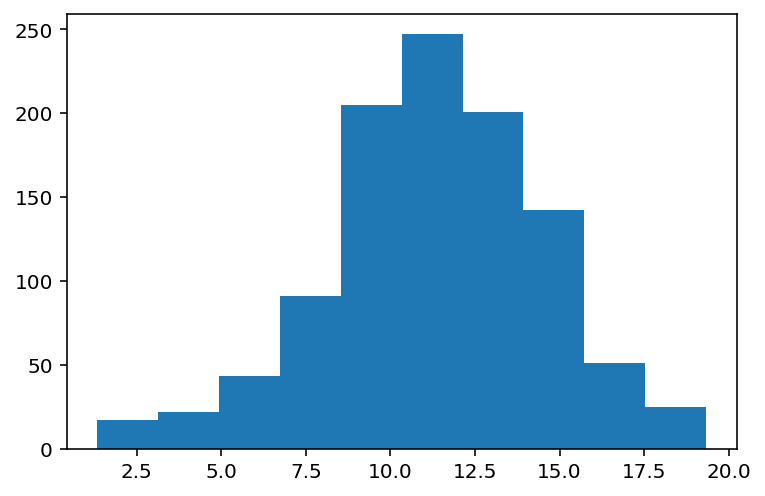

In [16]:
plt.hist(df.mean_periods)

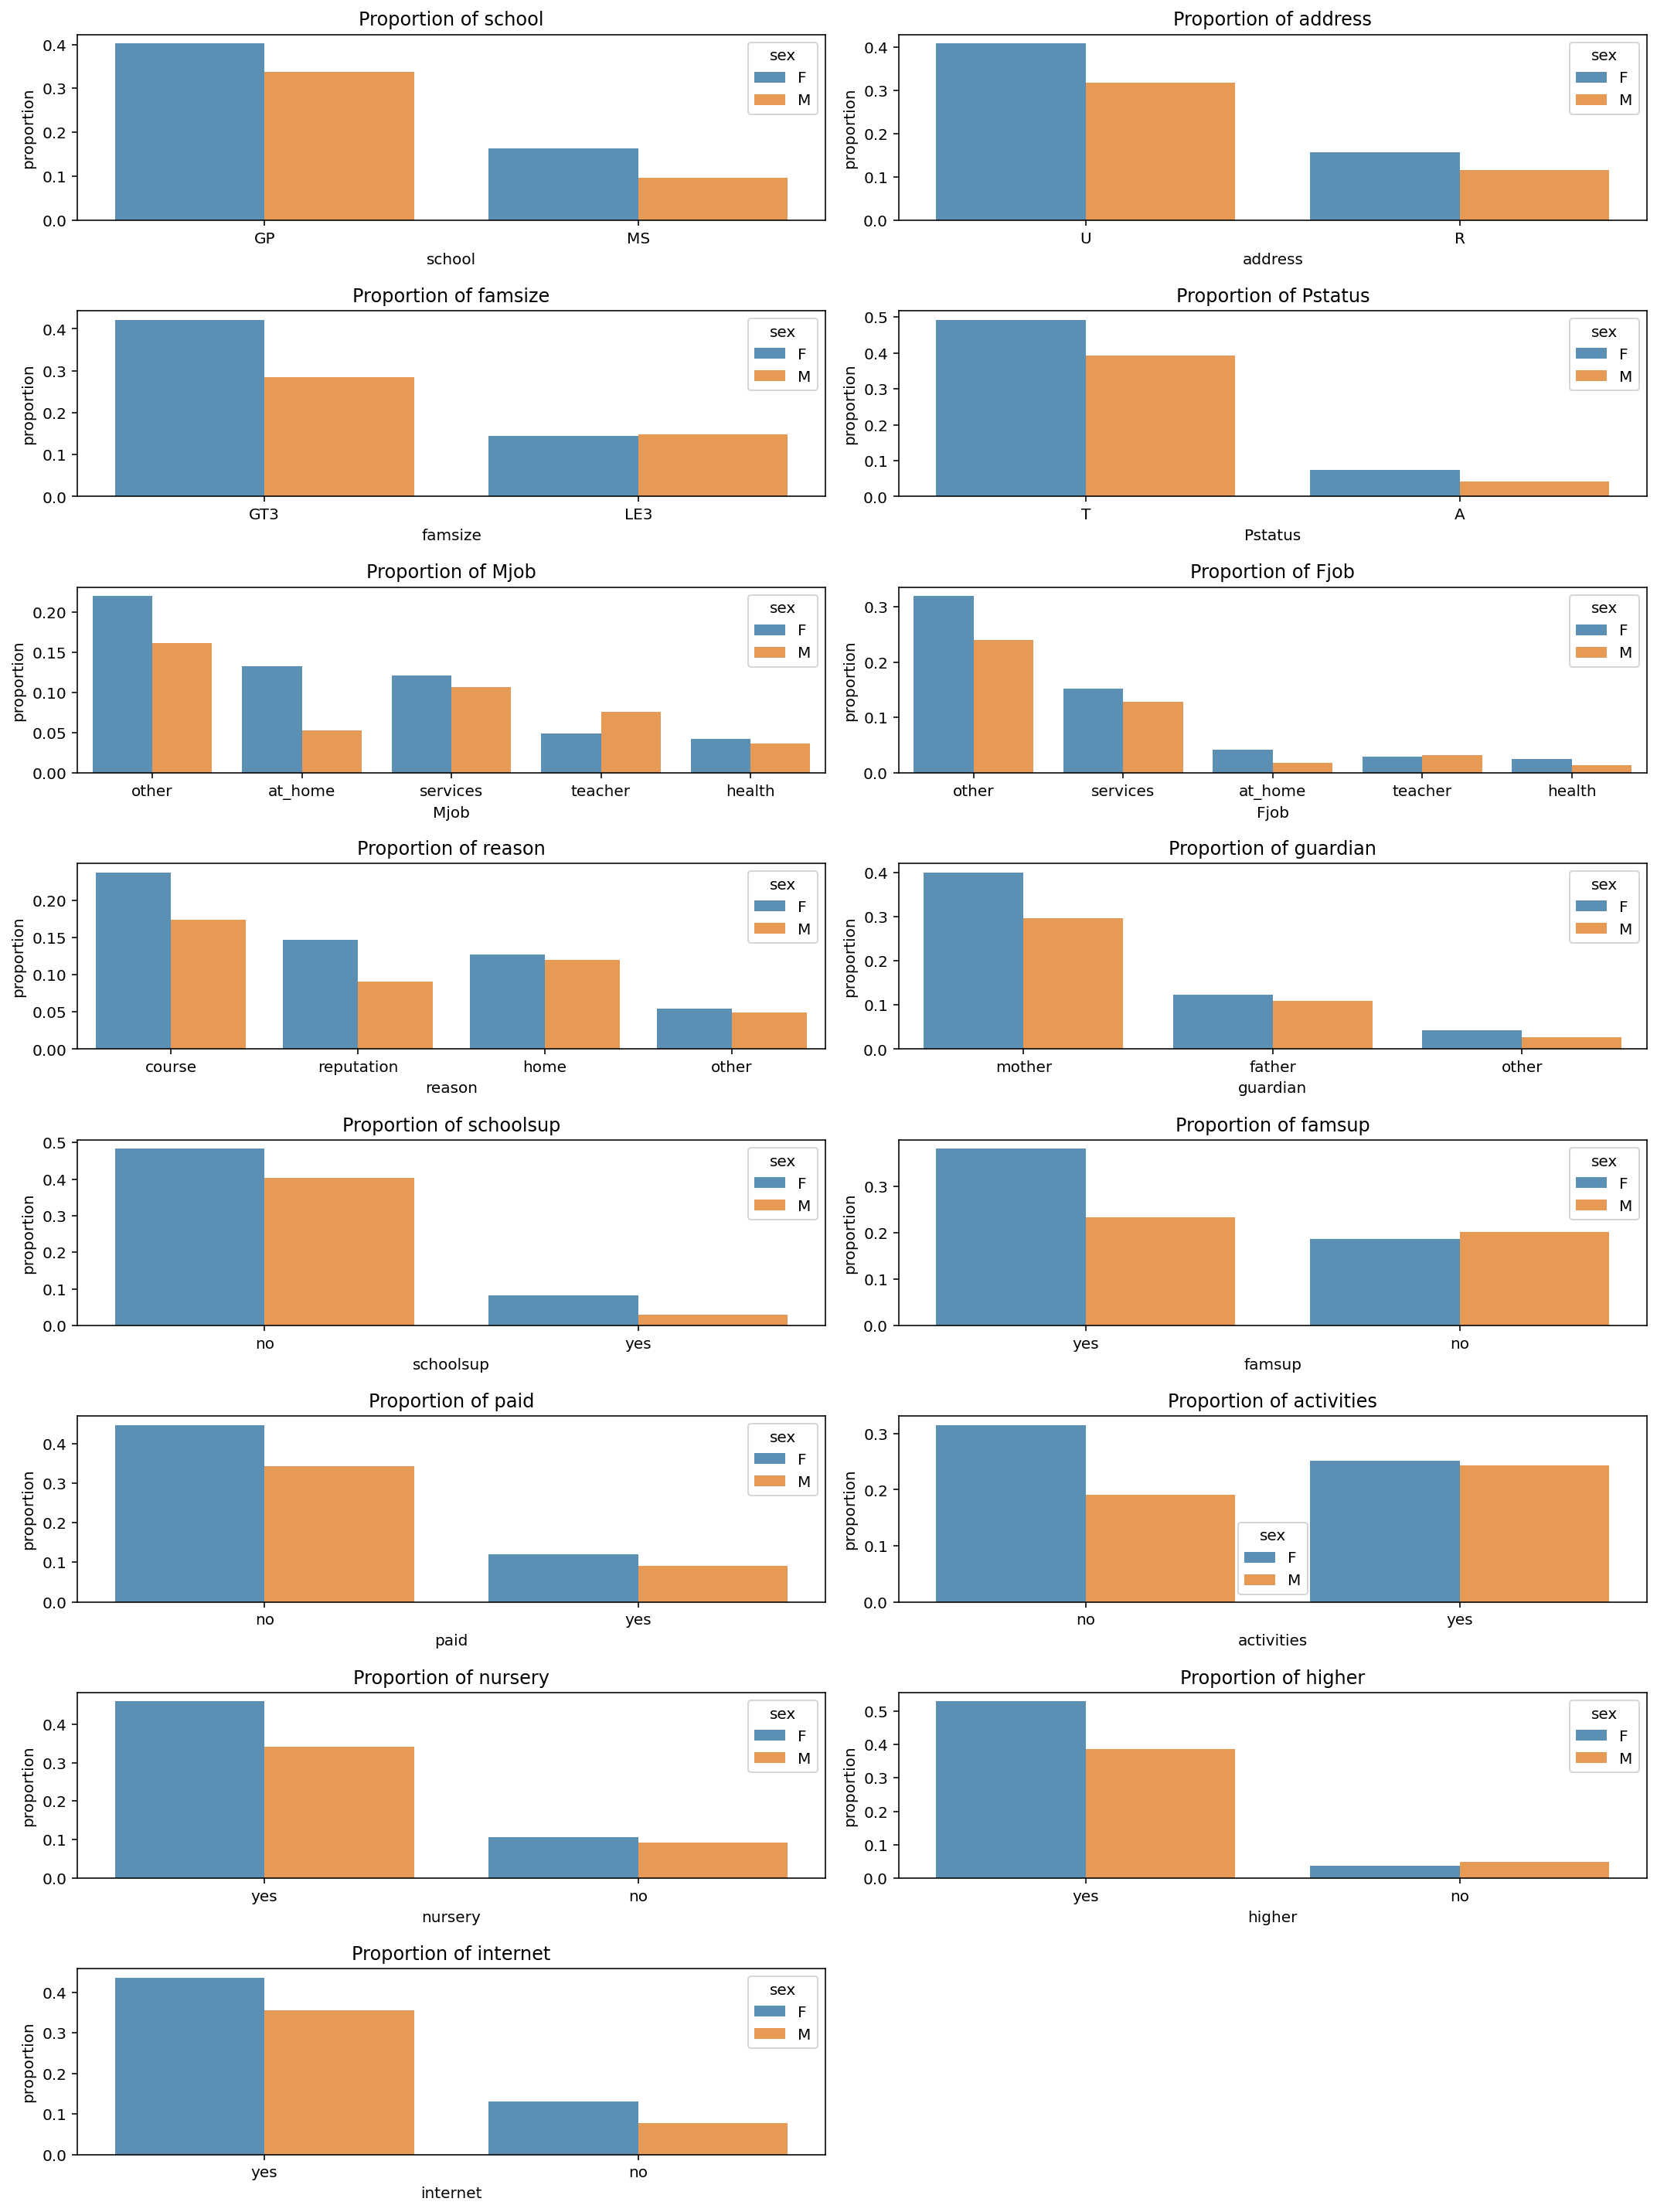

In [17]:
cols_obj = list(df.dtypes[df.dtypes == object].index[0:])
cols_obj.pop(1)
i=1
plt.figure(figsize=[15,20])
y, hue = 'proportion', 'sex'

for f in cols_obj:
    plt.subplot(8,2,i)
    df[[f, 'sex']]\
       .value_counts(normalize=True)\
       .rename(y)\
       .reset_index()\
       .pipe((sns.barplot, "data"), x=f, y='proportion', hue='sex', alpha=0.8)
    plt.title(f'Proportion of {f}')
    i+=1
plt.tight_layout()

In [18]:
cols_cont = [column for column in df.columns if column not in cols_obj and 
             column not in ['sex', 'Medu','Fedu','failures',]]

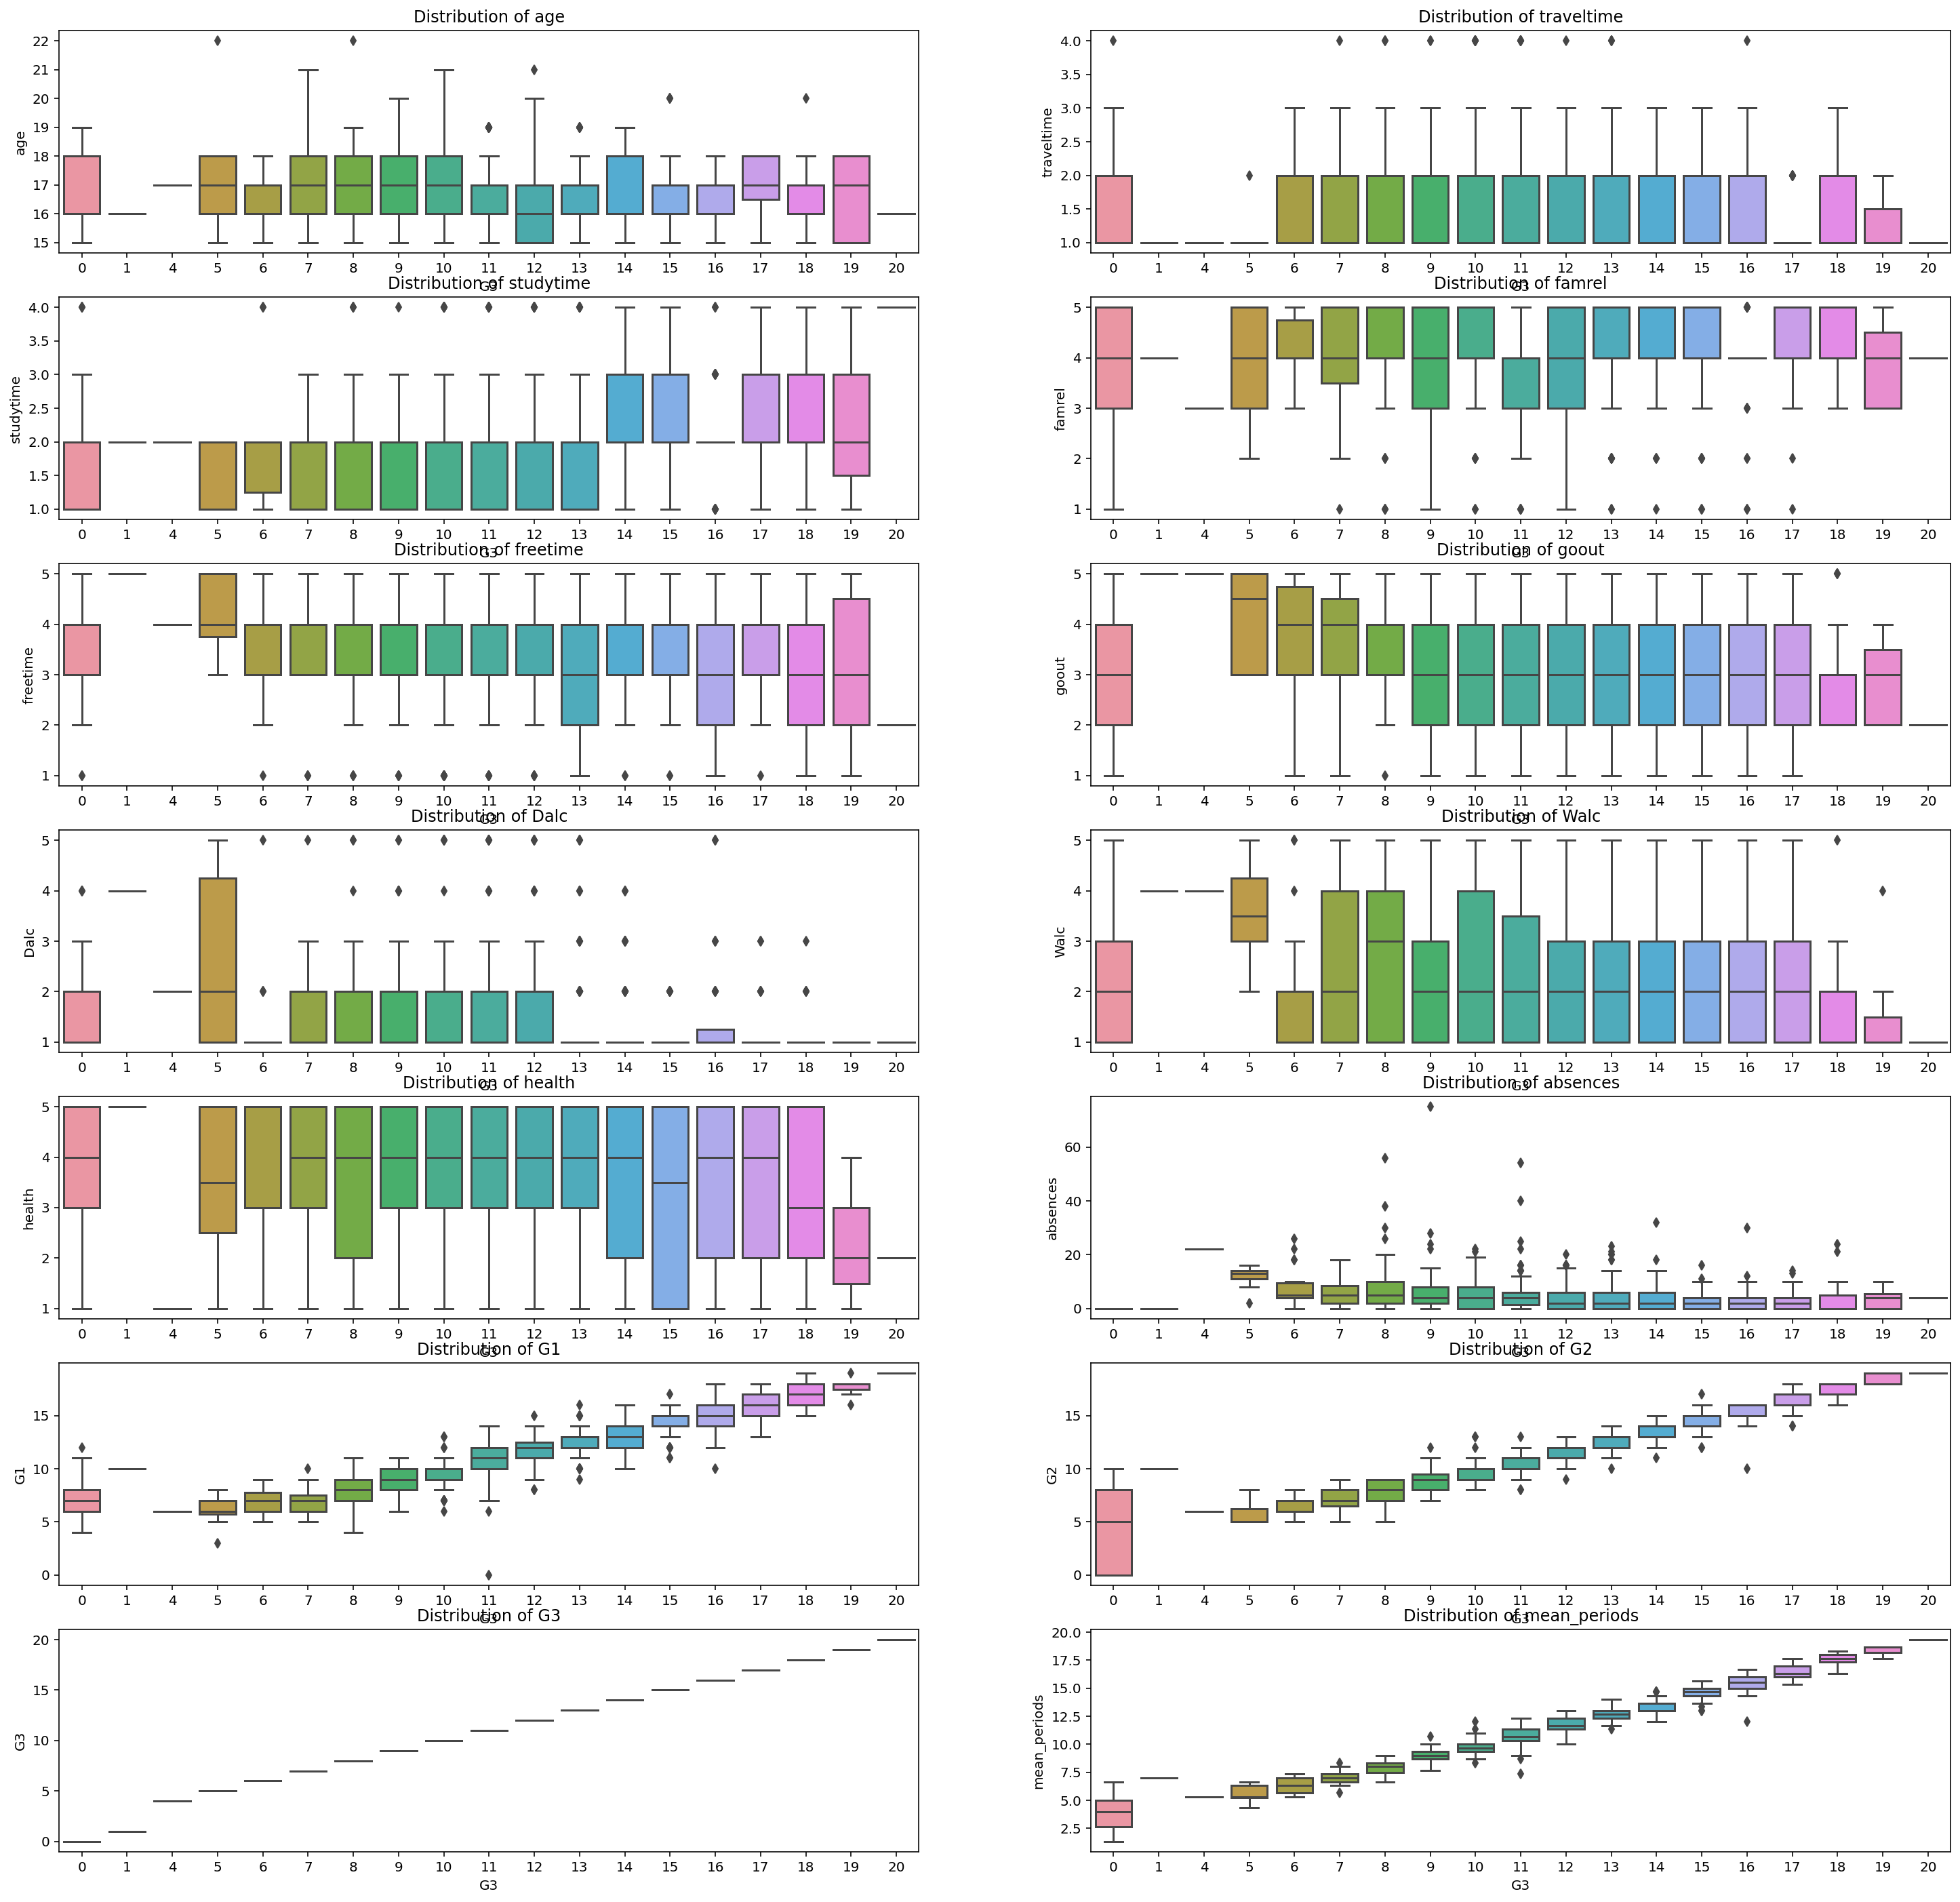

In [19]:
plt.figure(figsize=[25, 50])
i = 1

for x in cols_cont:
    plt.subplot(14,2,i)
    sns.boxplot(x='G3', y=x, data=df)
    i+=1
    plt.title(f'Distribution of {x}')

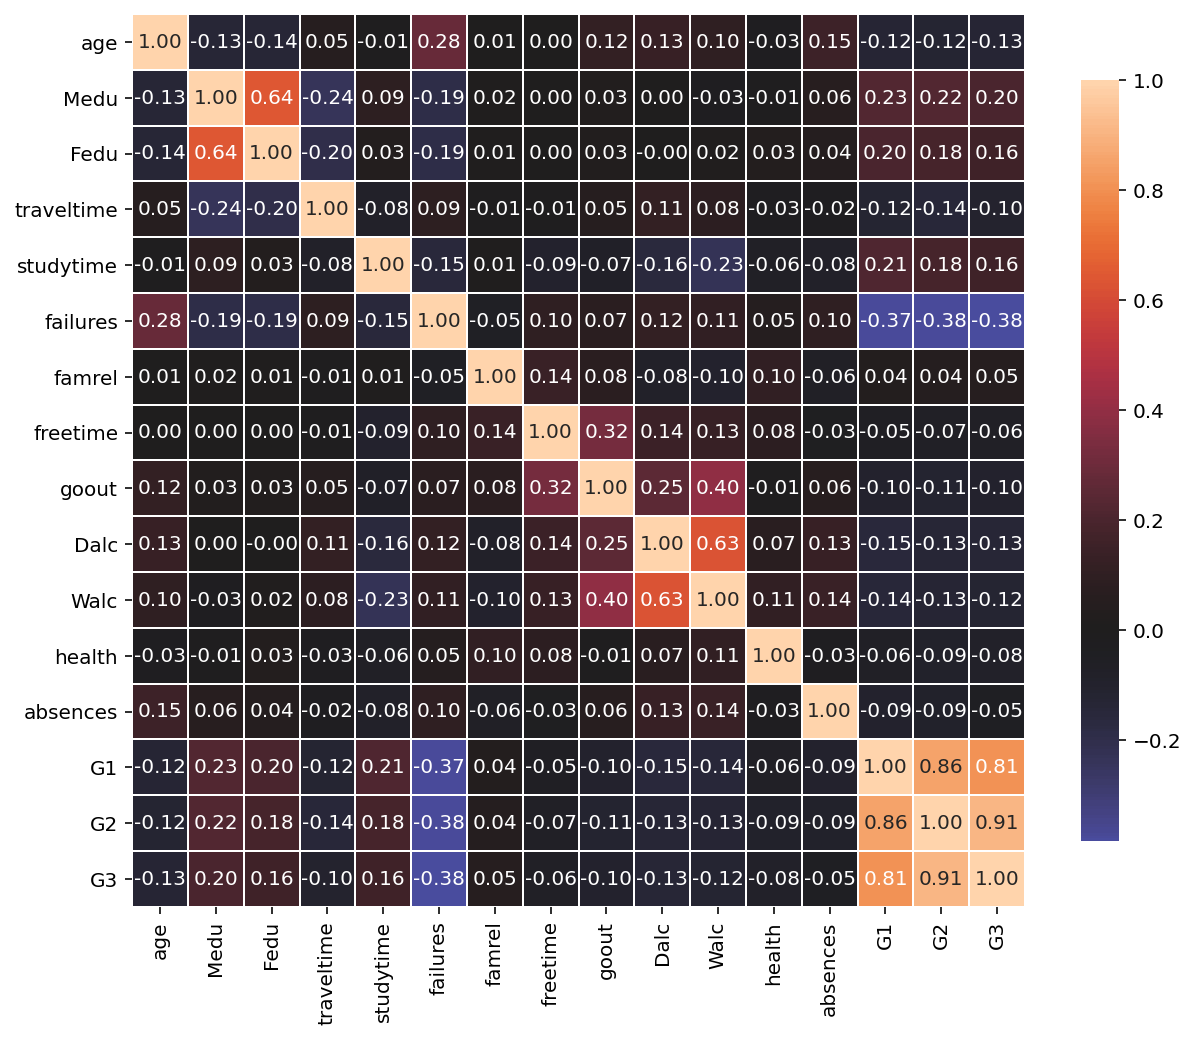

In [20]:
cols_num = list(df.dtypes[df.dtypes == 'int64'].index[0:])
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df[cols_num])


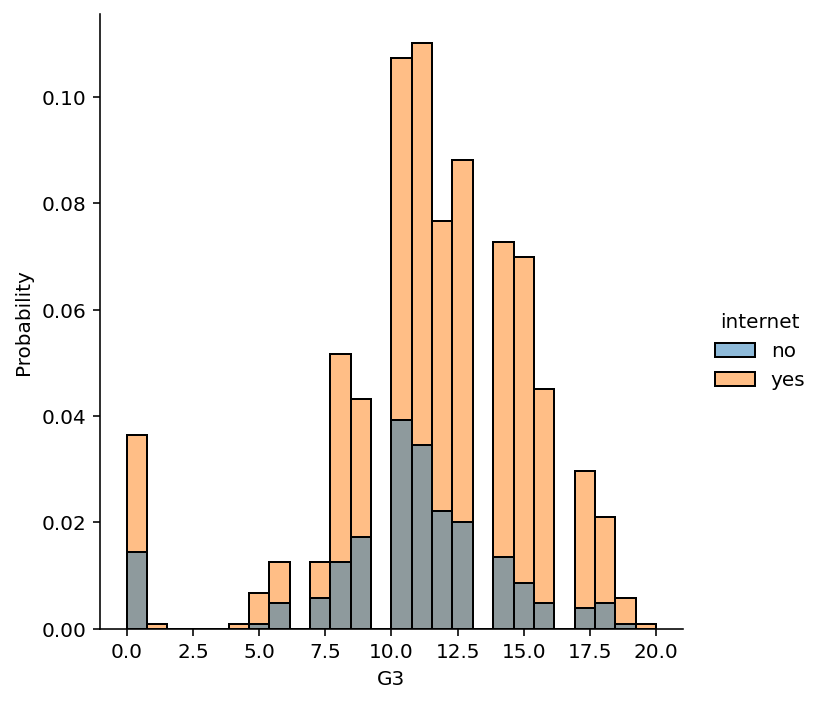

In [21]:
sns.displot(x='G3',
           hue='internet', 
           data=df,
           stat='probability')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


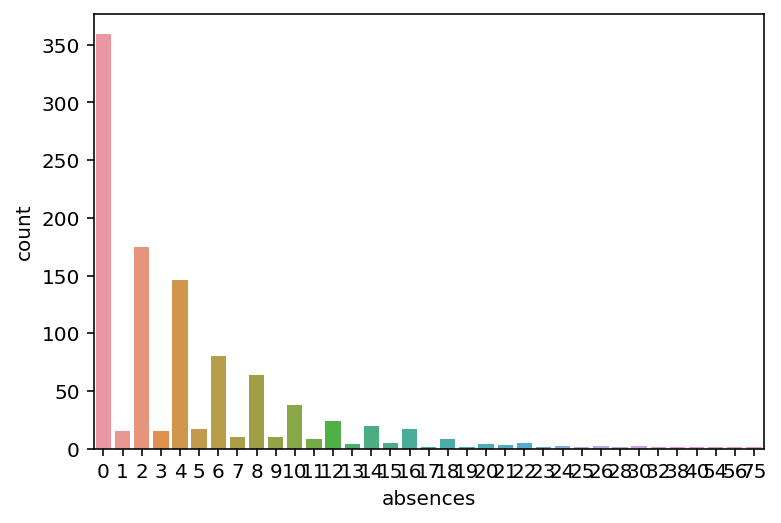

In [22]:
sns.countplot(df.absences)

In [23]:
y = df['G3']

X = df.drop(['G1', 'G2', 'mean_periods', 'school'], axis=1)

X = pd.get_dummies(X)

In [24]:
most_correlated = X.corr().abs()['G3'].sort_values(ascending=False)


In [25]:
most_correlated = most_correlated[:9]
most_correlated

G3            1.000000
failures      0.383145
higher_yes    0.236578
higher_no     0.236578
Medu          0.201472
studytime     0.161629
Fedu          0.159796
Dalc          0.129642
age           0.125282
Name: G3, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 80)

In [27]:
X_train = X_train.drop('G3', axis=1)
X_test = X_test.drop('G3', axis=1)

In [28]:
models_df =  pd.DataFrame(columns=['mae', 'rmse', 'accuracy'])

In [29]:
def make_report(models_df, model, X_test, y_test, name):
    report = pd.DataFrame(columns={'mae'}, data=[0])
    
    report['mae'] = mean_absolute_error(y_test, model.predict(X_test).round())
    report['rmse'] = np.sqrt(mean_squared_error(y_test, model.predict(X_test).round()))
    report['accuracy'] = accuracy_score(y_test, model.predict(X_test).round())
    
    report.index = [name]
    models_df = models_df.append(report)
    return models_df


In [30]:

# A logistic regressor is used to predict the marks of the student in the third subject.
# It is also used for comparison with other methods.
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
models_df = make_report(models_df, lr, X_test, y_test, 'Logistic_regression')

In [32]:
models_df

,mae,rmse,accuracy
Logistic_regression,3.009569,4.418859,0.143541


In [33]:
# A decision tree regressor is used to improvise upon other regressor methods and is used 
# to predict the marks of the student in the third subject.
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [34]:
models_df = make_report(models_df, tree, X_test, y_test, 'Decision Tree')

In [35]:
models_df

,mae,rmse,accuracy
Logistic_regression,3.009569,4.418859,0.143541
Decision Tree,2.827751,4.023258,0.129187


In [36]:
# The linear regression model is a simple model to perform regression over the input parameters and use that to obtain the marks.
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
models_df = make_report(models_df, linear, X_test, y_test, 'Linear Regression')

In [38]:
linear.score(X_train, y_train)

0.2454436958198778

In [39]:
models_df

,mae,rmse,accuracy
Logistic_regression,3.009569,4.418859,0.143541
Decision Tree,2.827751,4.023258,0.129187
Linear Regression,2.421053,3.395747,0.133971


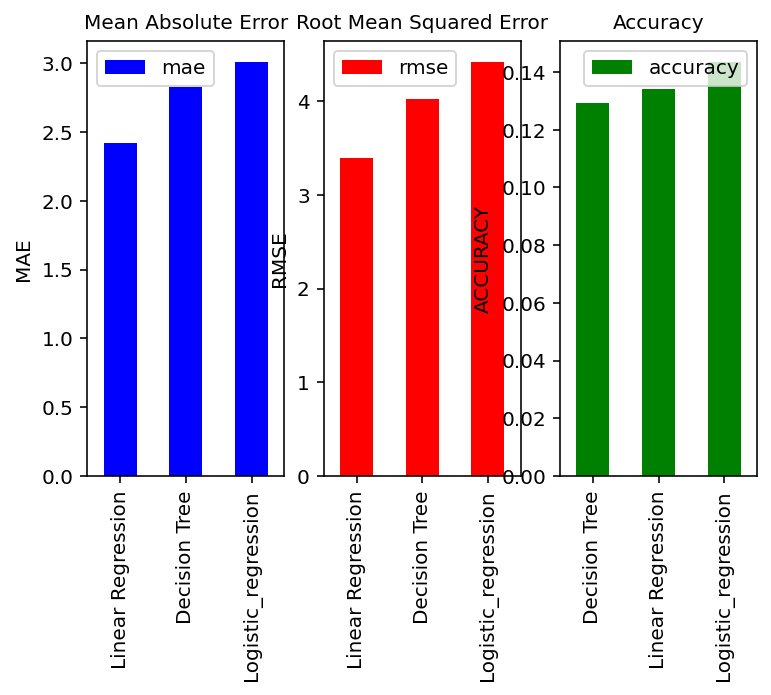

In [40]:
# Root mean squared error
ax =  plt.subplot(1, 3, 1)
models_df.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax, fontsize=10)
plt.title('Mean Absolute Error', fontsize=10) 
plt.ylabel('MAE', fontsize= 10)

# Median absolute percentage error
ax = plt.subplot(1, 3, 2)
models_df.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax, fontsize=10)
plt.title('Root Mean Squared Error', fontsize=10) 
plt.ylabel('RMSE',fontsize= 10)

ax = plt.subplot(1, 3, 3)
models_df.sort_values('accuracy', ascending = True).plot.bar(y = 'accuracy', color = 'g', ax = ax, fontsize=10)
plt.title('Accuracy', fontsize=10) 
plt.ylabel('ACCURACY',fontsize=10)
plt.show()